In [1]:
import pandas as pd
df = pd.read_csv("dataset_heart.csv")
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Map 'heart disease' values from [1, 2] to [0, 1]
df['heart disease'] = df['heart disease'].map({1: 0, 2: 1})

X = df.drop("heart disease", axis=1)
y = df["heart disease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
print(X_train.info())
print("\nmissing values：")
print(X_train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 115 to 102
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   216 non-null    int64  
 1   sex                                   216 non-null    int64  
 2   chest pain type                       216 non-null    int64  
 3   resting blood pressure                216 non-null    int64  
 4   serum cholestoral                     216 non-null    int64  
 5   fasting blood sugar                   216 non-null    int64  
 6   resting electrocardiographic results  216 non-null    int64  
 7   max heart rate                        216 non-null    int64  
 8   exercise induced angina               216 non-null    int64  
 9   oldpeak                               216 non-null    float64
 10  ST segment                            216 non-null    int64  
 11  major vessels         

In [4]:
print(X_train.describe())

              age        sex   chest pain type  resting blood pressure  \
count  216.000000  216.000000       216.000000              216.000000   
mean    54.763889    0.699074         3.180556              131.768519   
std      9.127255    0.459726         0.973983               17.879757   
min     29.000000    0.000000         1.000000               94.000000   
25%     48.000000    0.000000         3.000000              120.000000   
50%     55.500000    1.000000         3.500000              130.000000   
75%     61.250000    1.000000         4.000000              140.000000   
max     76.000000    1.000000         4.000000              200.000000   

       serum cholestoral  fasting blood sugar  \
count         216.000000           216.000000   
mean          250.152778             0.134259   
std            51.417577             0.341723   
min           141.000000             0.000000   
25%           213.750000             0.000000   
50%           243.500000             0.

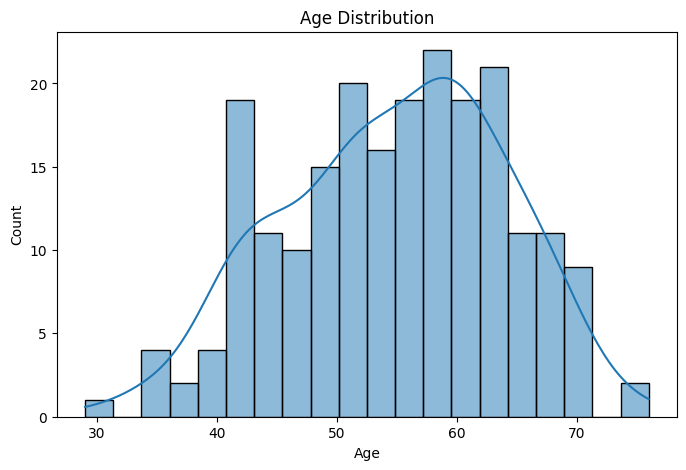

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(X_train["age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

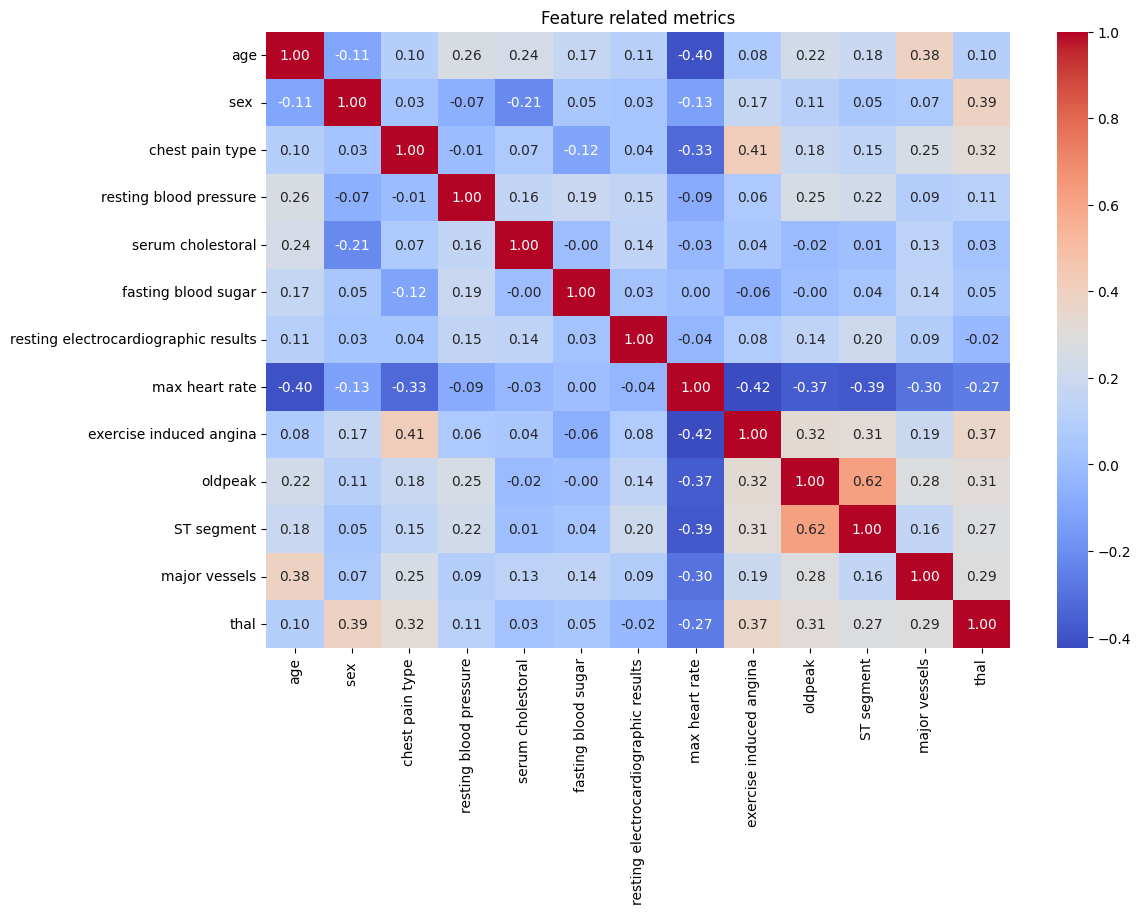

In [6]:
plt.figure(figsize=(12, 8))
corr = X_train.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature related metrics")
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Logistic Regression model
model = LogisticRegression(max_iter=1000)  # max_iter increased to ensure convergence

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9259259259259259

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.95      0.86      0.90        21

    accuracy                           0.93        54
   macro avg       0.93      0.91      0.92        54
weighted avg       0.93      0.93      0.93        54


Confusion Matrix:
 [[32  1]
 [ 3 18]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9259259259259259

This means that this logistic regression model correctly predicted about 93% of the cases in the test set.

🔹 This model is performing very well, especially for a first try without any hyperparameter tuning.
🔹 Class 1 has slightly better recall than Class 2, which might mean the model is more confident in predicting one class over the other.
🔹 F1-scores above 0.90 for both classes suggest this is a strong baseline.


In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # liblinear supports both l1 and l2
}

# Set up the model and grid search
log_reg = LogisticRegression(max_iter=1000)

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,              # 5-fold cross-validation
    scoring='accuracy',
    verbose=1,
    n_jobs=-1          # use all CPU cores
)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best parameters found:", grid_search.best_params_)

# Best model from grid search
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate performance
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

Accuracy: 0.9074074074074074

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54


Confusion Matrix:
 [[32  1]
 [ 4 17]]


Exercise 3 with GridSearchCV


🌟 Exercise 3 : Logistic Regression with Grid Search

Instructions
Build a logistic regression model using the dataset, but this time, use GridSearchCV to optimize the hyperparameters such as C and penalty.

In [9]:
# 1. Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Load dataset
df = pd.read_csv('dataset_heart.csv')

# 3. Split features and target
X = df.drop('heart disease', axis=1)
y = df['heart disease']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # Only solver that supports both l1 and l2
}

# 6. Set up GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# 7. Fit the model
grid_search.fit(X_train, y_train)

# 8. Print best parameters
print("Best parameters found:", grid_search.best_params_)

# 9. Use best model to predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 10. Evaluate model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best parameters found: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

Accuracy: 0.9074074074074074

Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.97      0.93        33
           2       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54


Confusion Matrix:
 [[32  1]
 [ 4 17]]


🌟 Exercise 4 : SVM without Grid Search
Instructions
Train a Support Vector Machine (SVM) classifier on the dataset without using grid search. Choose an appropriate kernel and set the hyperparameters manually.

In [10]:
from sklearn.svm import SVC

#Instantiate the SVM model with manually chosen hyperparameters
# Kernel: 'rbf' (Radial Basis Function), C = 1.0, gamma = 'scale'
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Fit the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6296296296296297

Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.79      0.72        33
           2       0.53      0.38      0.44        21

    accuracy                           0.63        54
   macro avg       0.60      0.58      0.58        54
weighted avg       0.61      0.63      0.61        54


Confusion Matrix:
 [[26  7]
 [13  8]]


This means that the model correctly classified 63% of the test cases.
This is lower than the previous logistic regression models (~90-91%), which suggests that the current SVM settings may not be optimal

🌟 Exercise 5 : SVM with Grid Search
Instructions
Implement an SVM classifier on the dataset with GridSearchCV to find the best combination of C, kernel, and gamma hyperparameters.

In [1]:
# 1. Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Load the dataset
df = pd.read_csv('dataset_heart.csv')

# 3. Split features and target, train-test split
X = df.drop('heart disease', axis=1)
y = df['heart disease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Define the parameter grid
param_grid = {
    'C': [1],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}

# 5. Instantiate GridSearchCV with SVC
grid = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1
)

# 6. Fit to the training data
grid.fit(X_train, y_train)

# 7. Get the best parameters
print("Best parameters found:", grid.best_params_)

# 8. Predict with the best model
best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test)

# 9. Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

Accuracy: 0.8518518518518519

Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.83      0.86        30
           2       0.81      0.88      0.84        24

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.86      0.85      0.85        54


Confusion Matrix:
 [[25  5]
 [ 3 21]]


🌟 Exercise 6 : XGBoost without Grid Search
Instructions
Use the dataset to train an XGBoost classifier without hyperparameter tuning. Set the hyperparameters manually and justify your choices.

In [2]:
!pip install xgboost

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('dataset_heart.csv')

# Map 'heart disease' values from [1, 2] to [0, 1]
df['heart disease'] = df['heart disease'].map({1: 0, 2: 1})

# Split features and target
X = df.drop('heart disease', axis=1)
y = df['heart disease']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Instantiate the XGBoost classifier with manually chosen hyperparameters
xgb = XGBClassifier(
    n_estimators=100,      # number of trees
    max_depth=3,           # maximum depth of a tree
    learning_rate=0.1,     # step size shrinkage
    use_label_encoder=False,  # to avoid warning
    eval_metric='logloss'     # evaluation metric
)

# Fit the model
xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7962962962962963

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81        30
           1       0.74      0.83      0.78        24

    accuracy                           0.80        54
   macro avg       0.80      0.80      0.80        54
weighted avg       0.80      0.80      0.80        54


Confusion Matrix:
 [[23  7]
 [ 4 20]]


In [9]:

df = pd.read_csv('dataset_heart.csv')
df['heart disease'] = df['heart disease'].map({1: 0, 2: 1})

# Split features and target
X = df.drop('heart disease', axis=1)
y = df['heart disease']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Initialize XGBClassifier
xgb = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss'
)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1  # Use all CPU cores
)

# Fit the model
grid_search.fit(X_train, y_train)

# Evaluate the best model
print("Best parameters found:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 11. Print performance
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}

Accuracy: 0.8148148148148148

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83        30
           1       0.77      0.83      0.80        24

    accuracy                           0.81        54
   macro avg       0.81      0.82      0.81        54
weighted avg       0.82      0.81      0.82        54


Confusion Matrix:
 [[24  6]
 [ 4 20]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:40:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
